#### Autori: Domenico Lembo, Giuseppe Santucci and Marco Schaerf

[Dipartimento di Ingegneria informatica, automatica e gestionale](https://www.diag.uniroma1.it)

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.eu.png"
     alt="License"
     style="float: left;"
     height="40" width="100" />
This notebook is distributed with license Creative Commons *CC BY-NC-SA*

# NumPy, Matplotlib ed altre utilities
1. NumPy
2. Il tipo array di NumPy
3. Creazione di un array in NumPy
4. Attributi della classe ndarray (array)
5. Indicizzazione, slicing e iterazione
6. Algebra lineare in NumPy
7. Esercizi su matrici come NumPy array
8. Matplotlib
9. Altre funzioni e librerie
10. Progetto finale

### Numpy
Questa lezione è basata sul tutorial [Quickstart](https://numpy.org/devdocs/user/quickstart.html) del sito ufficiale di [NumPy](https://numpy.org/) (in inglese).
Per eseguire questo notebook dovete installare sul vostro computer il modulo numpy, istruzioni dettagliate sono disponibili [qui](https://scipy.org/install.html), comunque per la maggior parte delle installazioni dovete solo aprire una shell di comandi e dare il comando: `pip install numpy`.

NumPy fa parte di un pacchetto di moduli Python per il calcolo scientifico, noi oltre NumPy vedremo, brevemente, anche [Matplotlib](https://matplotlib.org/).

### Il tipo array di NumPy
L'oggetto principale di NumPy è l'array multidimensionale **omogeneo**. È una tabella di elementi (solitamente numeri), tutti dello stesso tipo, indicizzati da una tupla di numeri interi non negativi. In NumPy le dimensioni sono chiamate assi.

Ad esempio, le coordinate di un punto nello spazio \[1, 2, 1\] hanno un asse. Quell'asse contiene 3 elementi, quindi diciamo che ha una lunghezza di 3. Nell'esempio mostrato di seguito, l'array ha 2 assi. Il primo asse ha una lunghezza di 2, il secondo asse ha una lunghezza di 3.

\[\[1., 0., 0.\],
 \[0., 1., 2.\]\]
 
La classe di array di NumPy si chiama *ndarray*. È anche conosciuto con l'alias *array*. Notate che numpy.array non è uguale alla classe Standard Python Library array.array, che gestisce solo array monodimensionali e offre molte meno funzionalità.

Per accedere ad un elemento di indici `i` e `j` di un array bidimensionale `m` si può usare la notazione delle liste di liste (cioé `m[i][j]`) oppure la notazione semplificata `m[i,j]`. Ovviamente, questa stessa notazione semplificata si può usare anche per array di dimensione superiore a 2.

Un esempio:

In [4]:
import numpy as np

#Creiamo, ad esempio, un array 2x3 (cioè con 2 righe e 3 colonne)
a = np.array([[1., 0., 0.],[0., 1., 2.]])
print(a)

#Stampiamo uno specifico elemento, ad esempio,
#quello sulla riga 0 colonna 1
print(a[0][1]) #notazione standard per liste di liste
print(a[0,1]) #notazione semplificata di NumPy

[[1. 0. 0.]
 [0. 1. 2.]]
0.0
0.0


### Creazione di un array in NumPy
Ci sono molti modi per creare un array in NumPy, si può direttamente creare un array fornendo tutti i dati, come visto sopra, si può trasformare una lista in array oppure si possono usare le molte funzioni di inizializzazione presenti in NumPy. **Notate che le dimensioni dell'array vanno fornite come tuple**, cioè scritte tra parentesi. 

La funzione *print()* applicata ad un oggetto di tipo array lo stampa automaticamente per righe, se è tridimensionale stampa un piano 2D per volta. Vediamo degli esempi:

In [3]:
# Crea un array 2D di uni con 3 righe e 4 colonne
print(np.ones((3,4))) #La tupla (3,4) denota la dimensione dell'array

# Crea un array 3D di zeri con dimensioni 2x3x4 ed ogni elemento di tipo intero (con segno) a 16 bit
print(np.zeros((2,3,4),dtype=np.int16)) #notate la stampa fatta di 2 matrici 3x4

# Crea un array 2D di valori casuali (random)
print(np.random.random((2,2)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[0.10944204 0.38262306]
 [0.84657221 0.29370295]]


In [4]:
# Crea un array 2D vuoto
print(np.empty((3,2)))

# Crea un array 2D pieno con il valore 7 (tutti gli elementi valgono 7)
print(np.full((2,2),7))

# Crea un array 1D con i valori da 10 a 25 (escluso) con passo 5
print(np.arange(10,25,5))

# Crea un array 1D con 9 valori uniformemente spaziati tra 0 e 2 (inclusi)
print(np.linspace(0,2,9))

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[7 7]
 [7 7]]
[10 15 20]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


### Rappresentazione interna degli array ed i metodi `reshape()` e `flatten()`
NumPy rappresenta in memoria gli array usando zone contigue di memoria. Di fatto, l'array viene rappresentato sempre **come un array monodimensionale**, dove le righe vengono scritte una dopo l'altra. Un array di dimensioni (3,4) ed un array di dimensioni (2,3,2) sono in realtà rappresentati in memoria entrambi come un array monodimensionale di 12 elementi. Per questo motivo, gli array possono essere facilmente cambiati di dimensioni, quando non cambia il numero di elemento complessivi, usando il metodo `reshape()`. Se vogliamo trasformare un array nella sua versione monodimensionale possiamo usare il metodo `flatten()`. Vediamo degli esempi:

In [5]:
a = np.random.random((3,4))
print(a)
b = a.reshape((2,3,2))
print(b)
c = a.flatten()
print(c)

[[0.18225127 0.49058228 0.16084472 0.17244706]
 [0.5352669  0.43645637 0.7517018  0.38174838]
 [0.78195138 0.94238043 0.84535116 0.31409819]]
[[[0.18225127 0.49058228]
  [0.16084472 0.17244706]
  [0.5352669  0.43645637]]

 [[0.7517018  0.38174838]
  [0.78195138 0.94238043]
  [0.84535116 0.31409819]]]
[0.18225127 0.49058228 0.16084472 0.17244706 0.5352669  0.43645637
 0.7517018  0.38174838 0.78195138 0.94238043 0.84535116 0.31409819]


### Attributi, operatori e funzioni della classe ndarray (array)
Gli *attributi* più importanti di un oggetto ndarray sono:
- **ndim**: il numero di assi (dimensioni) dell'array.
- **shape**: le dimensioni dell'array. Questa è una tupla di numeri interi che indica la dimensione dell'array rispetto a ciascun asse. Per una matrice con n righe e m colonne, la forma sarà (n, m). La lunghezza della tupla di shape è quindi il numero di assi.
- **size**: il numero totale di elementi dell'array. Questo è uguale al prodotto degli elementi di shape.
- **dtype**: un oggetto che descrive il tipo di elementi nella matrice. Si può creare o specificare i tipi usando i tipi standard di Python. Inoltre NumPy fornisce tipi propri: numpy.int32, numpy.int16 e numpy.float64 sono alcuni esempi.
- **itemsize**: la dimensione in byte di ciascun elemento dell'array. Ad esempio, un array di elementi di tipo float64 ha itemsize 8 (= 64/8), mentre uno di tipo complex32 ha itemsize 4 (= 32/8). È equivalente a ndarray.dtype.itemsize.
- **data**: il buffer contenente gli elementi effettivi dell'array. Normalmente, non è necessario utilizzare questo attributo perché accederemo agli elementi in un array utilizzando le funzionalità di indicizzazione.

In [6]:
a = np.array ([2,3,4])
print(a.dtype)
b = np.array ([1.2, 3.5, 5.1])
print(b.dtype)
c = np.array([[1,2], [3,4]], dtype = complex)
print(c)
print(c.dtype)

int32
float64
[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]
complex128


#### Operazioni di base
Gli operatori aritmetici sugli array si applicano a tutti gli elementi. Di regola, un nuovo array viene creato e riempito con il risultato.

In [8]:
a = np.array ([20,30,40,50])
b = np.arange (4)
c = a-b
#print(a)
#print(b)
print(c)
print(b**2)
print(10 * np.sin(a))
print(a)
print(a < 35)

[20 29 38 47]
[0 1 4 9]
[ 9.12945251 -9.88031624  7.4511316  -2.62374854]
[20 30 40 50]
[ True  True False False]


A differenza di molti linguaggi a matrice, l'operatore del prodotto * opera elemento per elemento negli array NumPy, cioè moltiplica gli elementi nella stessa posizione dei 2 arrays, che devono avere le stesse dimensioni. Il prodotto tra matrici può essere eseguito utilizzando l'operatore @ (in python> = 3.5) o il metodo dot()

In [9]:
A = np.array([[1,1],[0,1]])
B = np.array ([[2,0],[3,4]])
print(A * B) # è il prodotto elemento per elemento
print(A @ B) # è il prodotto tra matrici
print(A.dot(B)) # un altro prodotto tra matrici

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


Alcune operazioni, come += e \*=, agiscono per modificare un array esistente anziché crearne uno nuovo.

In [10]:
a = np.ones((2,3), dtype = int)
b = np.random.random((2,3))
a *= 3
print(a)
b += a
print(b)

a += b # va in errore poiché b non viene convertito automaticamente in tipo intero

[[3 3 3]
 [3 3 3]]
[[3.94416346 3.69333673 3.386844  ]
 [3.27967945 3.52715683 3.78360127]]


UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

Quando si lavora con array di tipi diversi, il tipo di array risultante corrisponde a quello più generale o preciso (un comportamento noto come upcasting). Se il tipo della variabile a cui lo assegniamo non è abbastanza generale si genera un errore, come sopra.

In [17]:
a = np.ones(3, dtype = np.int32)
b = np.linspace(0, np.pi, 3)
print(b.dtype)
print(a)
c = a + b
print(c)
print(c.dtype)

print(c *1j)

d = np.exp(c * 1j) #np.exp(a) calcola e^x per ogni valore x dell'array a in input
print(d)
print(d.dtype)

float64
[1 1 1]
[1.         2.57079633 4.14159265]
float64
[0.+1.j         0.+2.57079633j 0.+4.14159265j]
[ 0.54030231+0.84147098j -0.84147098+0.54030231j -0.54030231-0.84147098j]
complex128


Molte operazioni unarie, come calcolare la somma di tutti gli elementi dell'array, sono implementate come metodi della classe ndarray.

In [12]:
a = np.random.random((2,3))
print(a)
b = np.random.random(10)
print(b)


print(a.sum())
print(a.min())
print(a.max())

# per trovare l'indice in cui si trova il massimo (od il minimo) si può usare
# la funzione (NON METODO) argmax (argmin). Se l'array è monodimensionale restituisce
# l'indice, altrimenti restituisce l'indice dell'array flat (appiattito) in cui tutte
# le righe sono messe di seguito. In caso di più elementi pari al massimo (o minimo) 
# argmax restituisce l'indice più piccolo fra tutti quelli 
print(np.argmax(b))
print(np.argmin(b))

print(np.argmax(a))
print(np.argmin(a))

[[0.3737197  0.34008172 0.69231968]
 [0.36250732 0.27805593 0.1202986 ]]
[0.46603481 0.40825301 0.17412575 0.86443857 0.07734042 0.97756122
 0.61714007 0.80302215 0.88866282 0.35681637]
2.1669829506900693
0.12029860114026258
0.6923196781881822
5
4
2
5


Per impostazione predefinita, queste operazioni si applicano all'array come se fosse un elenco di numeri, indipendentemente dalla sua forma. Tuttavia, specificando il parametro axis è possibile applicare un'operazione lungo l'asse specificato di un array:

In [13]:
b = np.arange(12).reshape(3,4)
print(b)

print(b.sum(axis = 0)) # somma di ogni colonna, restituisce un array con una dimensione in meno
print(b.min(axis = 1)) # min di ogni riga, restituisce un array con una dimensione in meno
print(b.cumsum(axis = 1)) # somma cumulativa lungo ogni riga

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[0 4 8]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


#### Funzioni universali
NumPy fornisce funzioni matematiche familiari come sin, cos ed exp. In NumPy, queste sono chiamate "funzioni universali" (ufunc). All'interno di NumPy, queste funzioni operano su un array elemento per elemento, producendo un array come output.

In [14]:
B = np.arange(3)
print(B)

print(np.exp(B))

print(np.sqrt(B))

C = np.array([2., -1., 4.])
print(np.add(B, C))

[0 1 2]
[1.         2.71828183 7.3890561 ]
[0.         1.         1.41421356]
[2. 0. 6.]


### Indicizzazione, slicing e iterazione
Le matrici multidimensionali possono essere indicizzate, suddivise e ripetute, in modo simile alle liste e ad altre sequenze di Python, ma anche **contemporaneamente** su più assi usando la notazione semplificata. Attraverso lo slicing si può, ad esempio, estrarre una colonna della matrice od anche le colonne dispari. Vediamo alcuni esempi.

In [15]:
b = np.arange(9) #crea array 1D di 12 elementi
print(b)
print()
print(b[2]) # stampa l'elemento di indice 2
print()
print(b[1:8:2])
print()

d=b[::-1]

print(d.shape)
print(d)

print('\n#### consideriamo ora un caso a 2D ####\n')


c = np.arange(20).reshape(4,5) #crea array 4x5 da un array 1D di 20 elementi
print(c)
print()
print('l\'elemento in posizione 2,3 è',c[2,3]) # stampa l'elemento di indice 2, 3
print()
print(c[1:4:2,:]) #seleziona le righe 1 e 3 e tutte le colonne
print()
print(c[1:3,1:4]) #seleziona le righe 1 e 2 e le colonne 1, 2 e 3
print()
print(c[:,::2]) #seleziona le colonne pari
print()

d=c[:,2:3] #seleziona la colonna 2
print('la dimenzione dell\'array è', d.shape)
print('il suo tipo è',d.dtype)
print(d)

print('\n#### vediamo ora degli esempi di iterazioni ####\n')

for i in b:
    print(i ** 2) # calcola il quadrato degli elementi di b e stampa ciascun valore su una riga diversa

print()
    
for i in c:
    print(i ** 2) # calcola, riga per riga, il quadrato degli elementi

print()
    
for i in range(c.shape[0]):    # stampa ciascun valore di c su una riga diversa
    for j in range(c.shape[1]):
        print(c[i,j]) 

print()
        
for riga in c:    # versione alternativa che itera sugli elementi e non sugli indici
    for elem in riga:
        print(elem) 


[0 1 2 3 4 5 6 7 8]

2

[1 3 5 7]

(9,)
[8 7 6 5 4 3 2 1 0]

#### consideriamo ora un caso a 2D ####

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

l'elemento in posizione 2,3 è 13

[[ 5  6  7  8  9]
 [15 16 17 18 19]]

[[ 6  7  8]
 [11 12 13]]

[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]
 [15 17 19]]

la dimenzione dell'array è (4, 1)
il suo tipo è int32
[[ 2]
 [ 7]
 [12]
 [17]]

#### vediamo ora degli esempi di iterazioni ####

0
1
4
9
16
25
36
49
64

[ 0  1  4  9 16]
[25 36 49 64 81]
[100 121 144 169 196]
[225 256 289 324 361]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


#### Algebra lineare in NumPy
NumPy ha molte operazioni di algebra lineare predefinite, in modo che si possono facilmente svolgere complessi calcoli matriciali. Vediamo solo alcuni semplici esempi:

In [16]:
a = np.array([[1.0, 2.0], [3.0, 4.0]])
print(a)

print()

print(a.transpose())

print()

print(np.linalg.inv(a)) # Inversa di a

print()

u = np.eye(2) # matrice identità 2x2; "eye" significa "I"
print(u)

print()

j = np.array([[0.0, -1.0], [1.0, 0.0]])
print(j @ j)        # matrice prodotto

print()

y = np.array([[5.], [7.]])
print(np.linalg.solve(a, y)) # Trova il vettore x tale che y=a*x

#print(a @ np.array([[-3.],[ 4.]])) verifica

print()

print(np.linalg.eig(j)) # trova gli autovalori e gli autovettori della matrice j
                        # restituisce un array monodimensionale w contenente gli autovalori,
                        # ed un array v contenente gli autovettori, tali che v[:,i] 
                        # è l'autovettore corrispondente all'autovalore w[i].

[[1. 2.]
 [3. 4.]]

[[1. 3.]
 [2. 4.]]

[[-2.   1. ]
 [ 1.5 -0.5]]

[[1. 0.]
 [0. 1.]]

[[-1.  0.]
 [ 0. -1.]]

[[-3.]
 [ 4.]]

(array([0.+1.j, 0.-1.j]), array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]]))


### Esercizi su matrici come NumPy array
Rivediamo tutti gli esercizi visti in precedenza nella rappresentazione come lista di liste, ma usando ora gli array di NumPy. Vediamo come molte delle operazioni diventano ora banali.
1. Esercizio: Ricerca dell'elemento massimo: Funzione che prende in input una matrice e restituisce il valore massimo presente; assume che la matrice non sia vuota. 
2. Esercizio: Ricerca della riga a somma massima: Funzione che prende in input una matrice e restituisce l'indice della riga di somma massima presente; assume che la matrice non sia vuota e che nel caso ci siano più righe di somma massima la funzione restituisca la riga con indice minore.
3. Esercizio: Somma di matrici (stessa dimensione).
4. Esercizio: Prodotto di matrici (dimensioni compatibili).

In [18]:
# Creiamo 2 matrici 4x3 a e b ed una matrice c 3x4, tutte con numeri random
a = np.random.random((4,3))
b = np.random.random((4,3))
c = np.random.random((3,4))
print(a)
print()
print(b)
print()
print(c)
print()

# Esercizio 1: basta usare la funzione np.max()
print('esercizio1: ',np.max(a))

# Esercizio 2: Scansiona le righe e trova il massimo
sommarighe = np.sum(a,axis=1) #calcolo il vettore somma delle righe
print(sommarighe)
print(np.argmax(sommarighe)) #restituisco l'indice dell'elemento massimo

# Esercizio 3: basta usare l'operatore +
print(a+b) # Il risultato ha le stesse dimensioni di a e b

# Esercizio 4: basta usare l'operatore @
print(a@c) # Poiché a è 4x3 e c 3x4 il risultato è un array 4x4

[[0.38860597 0.69621504 0.58986187]
 [0.04590775 0.60998098 0.13411201]
 [0.69194111 0.83803967 0.73471593]
 [0.32967328 0.85399523 0.75338685]]

[[0.96254722 0.76345789 0.19424806]
 [0.69805254 0.86726274 0.39379599]
 [0.86197624 0.10020082 0.69860349]
 [0.39682145 0.86870558 0.77865469]]

[[0.60694399 0.35022882 0.20060721 0.81164063]
 [0.26033669 0.76791821 0.52805406 0.34245371]
 [0.89968562 0.77148567 0.67396547 0.06582959]]

esercizio1:  0.8539952329519199
[1.67468288 0.79000074 2.26469671 1.93705536]
2
[[1.35115319 1.45967293 0.78410994]
 [0.74396029 1.47724372 0.527908  ]
 [1.55391736 0.93824049 1.43331942]
 [0.72649473 1.72270081 1.53204153]]
[[0.94780262 1.1258072  0.84314287 0.59266018]
 [0.30732251 0.58795921 0.42169922 0.25497938]
 [1.29915533 1.45270645 1.07651179 0.89696336]
 [1.10023082 1.35248673 1.0248472  0.60962521]]


#### Esercizio: calcolo del più grande punto di sella
Scrivere una funzione che prende in input un array bidimensionale **a** e restituisce (se esiste) la tupla (i,j) della posizione del più grande punto di sella presente nell'array. Se non esiste deve restituire la tupla (-1,-1). Si definisce punto di sella (i,j) una posizione tale che a\[i,j\] è il minimo valore della riga i ed il massimo valore della colonna j o viceversa. Assumete, per semplicità, che ogni riga ed ogni colonna abbia uno ed un solo massimo e minimo.

In [19]:
import numpy as np

def maxPuntoSella(a):
    ris = (-1,-1) # per ora non ho trovato punti di sella
    minrighe = np.argmin(a,axis=1) # Trova gli indici dei minimi per riga
    maxrighe = np.argmax(a,axis=1) # Trova gli indici dei massimi per riga
    mincol = np.argmin(a,axis=0) # Trova gli indici dei minimi per colonna
    maxcol = np.argmax(a,axis=0) # Trova gli indici dei massimi per colonna
    righe = len(minrighe) # numero di righe dell'array a
    # un punto di sella (i,j) minimo sulle righe e massimo sulle colonne ha la proprietà che
    # j = minrighe[i] e i = maxcol[j], la colonna j è la minima sulla riga i e la riga i
    # è la massima nella colonna j. per l'altro tipo di punto di sella vale il simmetrico
    for i in range(righe):
        j = minrighe[i] # cerco punti di sella minriga-maxcol
        if i == maxcol[j]: # Trovato un punto di sella minriga-maxcol
            if ris == (-1,-1): # primo punto di sella trovato
                ris = (i,j)
            elif a[i,j] > a[ris]: # Trovato un nuovo punto di sella, più grande del massimo precedente
                ris = (i,j)
        j = maxrighe[i] # cerco punti di sella maxriga-mincol
        if i == mincol[j]: # Trovato un punto di sella maxriga-mincol 
            if ris == (-1,-1): # primo punto di sella trovato
                ris = (i,j)
            elif a[i,j] > a[ris]: # Trovato un nuovo punto di sella, più grande del massimo precedente
                ris = (i,j)
    return ris

a = np.random.random((5,5))
print(a,maxPuntoSella(a))
b = np.array([[1,2,0],[3,2,-2]])
print(b,maxPuntoSella(b))

[[0.82591426 0.07110457 0.58385493 0.44834343 0.60480949]
 [0.84158454 0.12822977 0.65370486 0.25056151 0.98964561]
 [0.20491948 0.868956   0.78867353 0.23992012 0.00148328]
 [0.47131755 0.86182276 0.82322168 0.86193734 0.71122278]
 [0.66528172 0.10795118 0.18219399 0.77059685 0.88570968]] (-1, -1)
[[ 1  2  0]
 [ 3  2 -2]] (0, 1)


### Matplotlib
Questa lezione è basata sul [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py) del sito ufficiale di [Matplotlib](https://matplotlib.org/) (in inglese).
Per eseguire questo notebook dovete installare sul vostro computer il modulo Matplotlib, istruzioni dettagliate sono disponibili [qui](https://matplotlib.org/users/installing.html).
Di tutta la libreria Matplotlib, qui presenteremo solo il modulo pyplot, per informazioni sugli altri moduli rimandiamo al sito ufficiale di Matplotlib.

#### Introduzione a pyplot
matplotlib.pyplot è una raccolta di funzioni in stile comando che fanno funzionare matplotlib come MATLAB. Ogni funzione pyplot apporta alcune modifiche a una figura: ad esempio, crea una figura, crea un'area di disegno in una figura, traccia alcune linee in un'area di disegno, decora la trama con etichette, ecc.

In matplotlib.pyplot vari stati vengono conservati attraverso le chiamate di funzione, in modo da tenere traccia di informazioni, relative, ad esempio, a quale sia la figura corrente e l'area di disegno. Le funzioni di disegno sono dirette agli assi attuali (si noti che per "assi" qui ci si riferisce alla parte degli assi di una figura e non al termine matematico rigoroso).

Per eseguire le funzioni di pyplot all'interno di un notebook dobbiamo specificare la modalità in cui farlo. La modalità più semplice è quella *inline*, cioè con immagini statiche generate all'interno del notebook. Per specificare questa modalità, **bisogna inserire il comando**:

**%matplotlib inline**

all'inizio della cella del nostro notebook.

La generazione di visualizzazioni con pyplot è molto rapida:

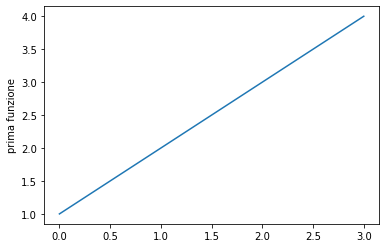

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('prima funzione')
plt.show()

Forse ti starai chiedendo perché l'asse x va da 0 a 3 e l'asse y da 1 a 4. Se fornisci un singolo elenco o array al comando `plot()`, matplotlib presume che sia una sequenza di valori y e genera automaticamente i valori x per te. Poiché gli intervalli di Python iniziano con 0, il vettore x predefinito ha la stessa lunghezza di y ma inizia con 0. Quindi i valori di x sono \[0,1,2,3\].

`plot()` è un comando versatile e può prendere un numero arbitrario di argomenti. Ad esempio, per tracciare la y in funzione della x si può usare il comando:

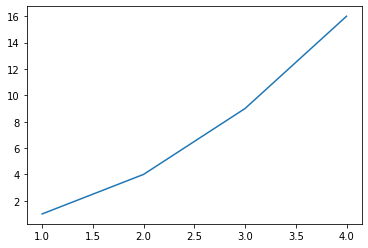

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

#### Scelta dello stile del grafico
Per ogni coppia di argomenti x ed y, esiste un terzo argomento facoltativo che è la stringa di formato che indica il colore e il tipo di linea del grafico. Le lettere e i simboli della stringa di formato provengono da MATLAB e si concatena una stringa di colore con una stringa di stile linea. La stringa di formato predefinita è 'b-', che è una linea blu continua. Ad esempio, per tracciare quanto sopra con cerchi rossi, devi scrivere

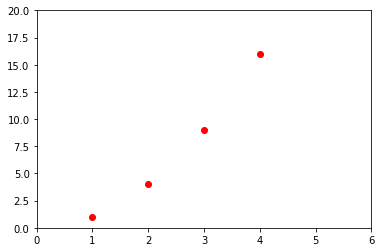

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Vedere la documentazione di `plot()` per un elenco completo di stili di linea e stringhe di formato. Il comando `axis()` nell'esempio precedente prende un elenco di \[xmin, xmax, ymin, ymax\] e specifica la dimensione degli assi.

Se matplotlib fosse limitato a lavorare con le liste, sarebbe abbastanza inefficiente per l'elaborazione numerica. In genere, utilizzerai array NumPy. In effetti, tutte le sequenze vengono convertite internamente in array NumPy. L'esempio seguente mostra un grafico di più linee con diversi stili di formato usando array, abbiamo anche messo un'etichetta per l'asse x ed una per l'asse y.

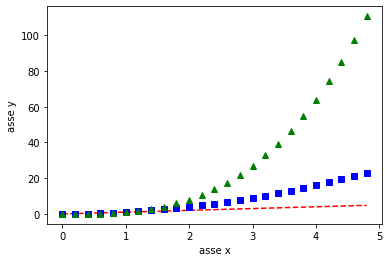

In [10]:
import numpy as np

# valori equamente spaziati ad intervalli di 200ms
x = np.arange(0., 5., 0.2)

# rosso tratteggiato per y = x, quadrati blu per y = x^2 e triangoli verdi per y = x^3
plt.plot(x, x, 'r--', x, x**2, 'bs', x, x**3, 'g^')
plt.xlabel('asse x') # scritta per l'asse x
plt.ylabel('asse y') # scritta per l'asse y
plt.show()

#### Grafico funzioni
In generale, se volete disegnare il grafico di una funzione definita da operazioni complicate, la cosa migliore è di definire la funzione *f* come una funzione Python usando gli operatori di NumPy e poi passargli l'array dei valori delle x per ottenere l'array dei valori delle y. Vediamo ad esempio come procedere se vogliamo disegnare la funzione

$$f(x) = e^{-x} cos(2{\pi}x)$$

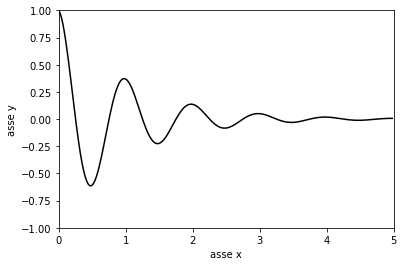

In [19]:
# Definiamo la funzione f
def f(x):
    return np.exp(-x) * np.cos(2*np.pi*x)

# Ora creiamo l'insieme dei valori di x che ci interessano
x = np.arange(0.0, 5.0, 0.02) # valori da 0 a 5 con passo 0.02

plt.plot(x, f(x), 'k')
plt.xlabel('asse x')
plt.ylabel('asse y')
plt.axis([0, 5, -1, 1])
plt.show()

#### Istogrammi
Gli istogrammi sono un facile metodo per visualizzare la frequenza di ogni valore in una sequenza x. In generale, per ogni valore della x viene visualizzata una barra verticale di altezza uguale al numero di frequenze di quel valore. Quando i valori distinti della x sono molti può convenire raggrupparli in gruppi, chiamati *bins* in pyplot. Per disegnare istogrammi si può usare la funzione `plt.hist()`. Questa funzione ha moltissimi parametri ed utilizzi, per un dettaglio potete vedere la [documentazione](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) (in inglese). vediamo 2 esempi, uno molto semplice con pochi valori distinti della x ed uno più compesso.

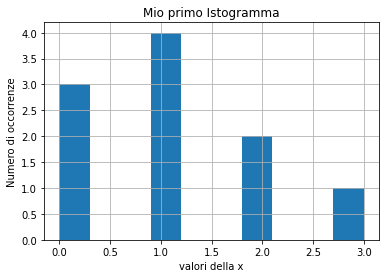

In [12]:
x = np.array([1, 0, 0, 1, 1, 2, 3, 2, 1, 0])

plt.hist(x)

plt.xlabel('valori della x')
plt.ylabel('Numero di occorrenze')
plt.title('Mio primo Istogramma')
plt.grid(True) # disegna la griglia per render più leggibile l'istogramma
plt.show()

Vediamo ora un caso in cui vogliamo creare un istogramma dei valori di IQ nel mondo. Per fare questo generiamo 10000 valori casuali tra -1 ed 1 e poi li moltiplichiamo per la deviazione standard e sommiamo la media per avere valori casuali distribuiti intorno a 100 (valore medio mondiale). Poiché i valori distinti della x sono moltissimi, decidiamo di dividerli in 50 bins (che verranno calcolati automaticamente da pyplot)

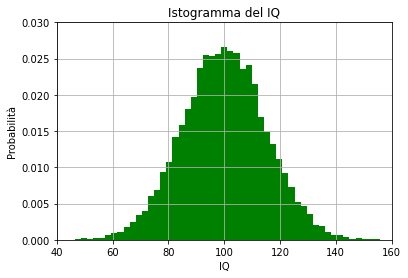

In [14]:
media = 100 # valore medio
deviazione = 15 # deviazione standard
x = media + deviazione * np.random.randn(10000)

# istogramma di questi dati con 50 bins orizzontali, valori normalizzati in modo che
# l'integrale complessivo del grafico sia 1 (appropriato per probabilità), di colore verde 'g'
plt.hist(x, 50, density=1, facecolor='g')

plt.xlabel('IQ')
plt.ylabel('Probabilità')
plt.title('Istogramma del IQ')
plt.axis([40, 160, 0, 0.03])
plt.grid(True) # disegna la griglia per rendere più leggibile l'istogramma
plt.show()

### Altre funzioni e librerie
Python ha un numero molto elevato di altri moduli e librerie predefinite che sono a disposizione dei programmatori, quali ad esempio [SciPy](https://www.scipy.org/) per il calcolo scientifico, [Pandas](https://pandas.pydata.org/) per l'analisi dei dati, [Keras](https://keras.io/), [TensorFlow](https://www.tensorflow.org/) e [PyTorch](https://pytorch.org/) per il cosiddetto *deep learning* e molte altre. Qui ora mostriamo solo alcune funzionalità della libreria *IPython.display* che saranno utili per lo sviluppo del progetto finale che descriveremo a breve.

#### Caricare, visualizzare e cancellare immagini
La libreria IPython.display ci mette a disposizione 3 funzioni per le immagini che ci saranno utili, cioè le funzioni *Image*, *display* e *clear_output*. Il loro comportamento è il seguente:
- La funzione `Image(url)` carica un immagine da un indirizzo web (url) e restituisce un oggetto di tipo image
- La funzione `display(image)` visualizza sullo schermo un oggetto di tipo image
- la funzione `clear_output()` cancella quanto visualizzato dalla cella.

Vediamo un semplice esempio:

<IPython.core.display.Image object>


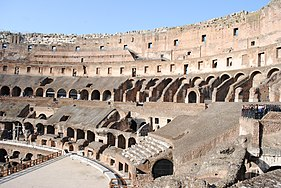

KeyboardInterrupt: Interrupted by user

In [15]:
from IPython.display import display, Image, clear_output

url1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Interno_del_Colosseo.jpg/281px-Interno_del_Colosseo.jpg"
url2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Colosseum_in_Rome-April_2007-1-_copie_2B.jpg/390px-Colosseum_in_Rome-April_2007-1-_copie_2B.jpg"

image1 = Image(url1) # carica l'immagine alla url1 nell'oggetto image1
print(image1)
image2 = Image(url2) # carica l'immagine alla url2 nell'oggetto image2

display(image1) # visualizza image1
input() # il programma aspetta un invio ('enter') prima di andare avanti
clear_output() # cancella output
input() # il programma aspetta un invio ('enter') prima di andare avanti
display(image2) # visualizza image2
input() # il programma aspetta un invio ('enter') prima di andare avanti
clear_output() # cancella output e termina


### Progetto finale
Sviluppiamo insieme un progetto finale che sfrutta quello che abbiamo imparato nel corso. Il progetto consiste nello sviluppare un piccolo gioco che propone immagini e chiede di indovinare la città e l'attrazione rappresentata nella foto. Il gioco lo sviluppiamo nel prossimo (ed ultimo) notebook di questo corso.